In [1]:
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
players20 = pd.read_csv("players_20.csv")

In [3]:
players20.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
players20.shape

(18483, 110)

In [6]:
players20 = players20.dropna(subset=features)

In [7]:
data = players20[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,94,94,560000.0,95500000.0,32
1,93,93,410000.0,58500000.0,34
2,92,92,290000.0,105500000.0,27
3,91,91,470000.0,90000000.0,28
4,91,91,370000.0,90000000.0,28
...,...,...,...,...,...
18478,48,60,1000.0,50000.0,21
18479,48,67,800.0,60000.0,18
18480,48,73,500.0,60000.0,17
18481,48,72,500.0,60000.0,17


In [8]:
# min max scaling 1-10

data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
data.describe()

,overall,potential,wage_eur,value_eur,age
count,18233.000000,18233.000000,18233.000000,18233.000000,18233.000000
mean,4.947751,5.894065,1.165285,1.235769,4.548722
std,1.511857,1.335224,0.383449,0.529691,1.782296
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.008937,1.030050,3.307692
50%,4.913043,5.782609,1.044683,1.067967,4.461538
75%,6.000000,6.652174,1.151921,1.198309,6.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [9]:
# randoming centroids

def r_c(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)


In [10]:
centroids = r_c(data, 5)
centroids

/var/folders/db/vl4f65dd09lgbw9_cj6fdm5c0000gn/T/ipykernel_27572/532499298.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2,3,4
overall,5.347826,5.347826,4.913043,2.304348,5.782609
potential,6.000000,6.217391,4.913043,5.782609,5.347826
wage_eur,1.000000,1.008937,1.598749,1.008937,1.026810
value_eur,1.017252,1.804990,1.084556,1.075077,1.049008
age,5.230769,4.846154,1.769231,5.230769,5.230769


In [11]:
# getting labels to data points by euclidean distance

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [12]:
labels = get_labels(data, centroids)

In [13]:
labels.value_counts()

4    5446
1    5123
2    3813
0    2131
3    1720
Name: count, dtype: int64

In [14]:
#calculating geometric mean 
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [15]:
# plotting

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

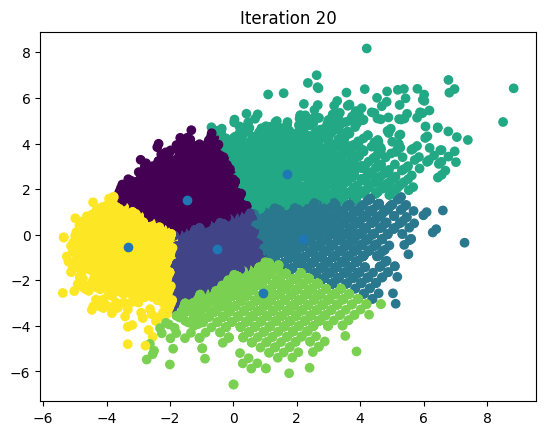

In [16]:
max_iterations = 100
centroid_count = 6

centroids = r_c(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [17]:
centroids

,0,1,2,3,4,5
overall,4.478562,4.571841,6.349770,7.123874,4.546699,2.469172
potential,6.818819,5.163970,6.228765,7.973429,4.350059,4.821239
wage_eur,1.060066,1.049310,1.258839,1.585121,1.042672,1.012726
value_eur,1.087321,1.062461,1.310321,2.015176,1.036096,1.013305
age,2.698596,4.442590,6.223868,4.104638,6.737702,2.528830


In [18]:
labels.value_counts()

1    3978
0    3656
2    3377
4    2707
5    2431
3    2084
Name: count, dtype: int64

In [21]:
players20[labels == 4][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
4048,N. Rimando,71,71,2000.0,240000.0,40
4049,T. Howard,71,71,2000.0,240000.0,40
4768,K. Beckerman,70,70,3000.0,275000.0,37
4772,J. Valdés,70,70,4000.0,450000.0,38
4773,G. Pegolo,70,70,12000.0,180000.0,38
...,...,...,...,...,...,...
18268,W. Horlison,51,51,1000.0,40000.0,27
18291,Teng Shangkun,50,51,2000.0,25000.0,28
18331,Z. Alkurt,50,50,2000.0,30000.0,28
18359,R. Hernández,50,50,1000.0,25000.0,30
